# Using the Grades Class to look at grades

## Set All Your Paremeters Here!
+ Set the course name and file names so the class will be able to look up your student data.  
+ You'll need at least the Gradescope Gradebook. [[**Download Link**]](https://www.gradescope.com/courses/447883/gradebook.csv)

In [1]:
course_name = "Math 4A"
quarter_name = "Fall 22"
gradescope_file_name = "Math_4A_Fall_2022_grades.csv"
egrades_roster_file_name = "F22_MATH4A_30932All.csv"
webwork_file_name = "Math_4A_Fall_2022_Webwork_Totals.csv"
path = r'C:\Users\natha\Python Stuff\22F Grades'

# You're going to grade based on categories such as "Homework" and "Midterm". Enter each of your categories on the
# list below in quotes. 
grade_item_categories = ["Homework", "Quiz", "Midterm", "Final"]

#Setting grade_category_dictionary to default of (waiting=5, normaliz=True, dropped=0) for every category.
grade_category_dictionary = {"Homework": (20, False, 0 ), "Quiz":(10, False, 0), "Midterm": (40, False, 0), "Final": (30, True, 2)}

## Initializing
+ Importing Packages, grading functions and the **Grades Class**.

In [2]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import requests
import os
import sys     

if path != None:
    sys.path.append(path)


from Grades_Class import *
from grading_functions import *
# from .. import Grades_Class# import *

sns.set()
sns.set_palette("deep")
mpl.style.context("fivethirtyeight", after_reset=False);

## Instantiating the Grades Class and Getting Student Data

In [3]:
# Insert the properties here. 
course = Grades(course_name, 
                quarter_name, 
                grade_item_categories, 
                grade_category_dictionary, 
                gradescope_file_name, 
                egrades_roster_file_name, 
                webwork_file_name
               )

course.get_all_grading_data(course_host = "Gauchospace", 
                            webwork_total_col_name = r'External tool:Webwork --- Homework due Fridays. Each Tuesday problems will "reduce" from 111% credit to 100% credit. (Percentage)'
                           )

## Totaling Grade Categories and Assigning Grades
+ Make any curve adjustments to individual assignments above the method at the top of this box so grade calculations reflect your changes.  
+ You can also **uncomment the code** below to  
    - Display Totals
    - Search for a student by Name and print out his or her grading breakdown

In [4]:
course.set_grading_data()
course.grades.to_csv(f"{quarter_name} {course_name} Grades Spreadsheet - Made with Nathan's Grades_Class.csv")
# Uncomment the a useful command below to display useful information!
# course.display_point_totals_by_category()
# course.print_student_grade_breakdown("chen", use_last_name = True)

## Plotting Histograms for Grade Items
+ See how the class did:
    + Plot a **single grading item**, or
    + Plot **an entire category** such as Quizzes. 

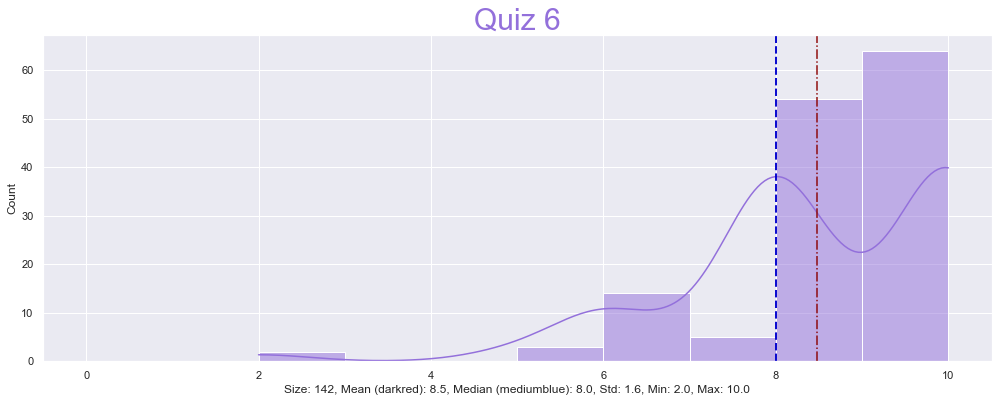

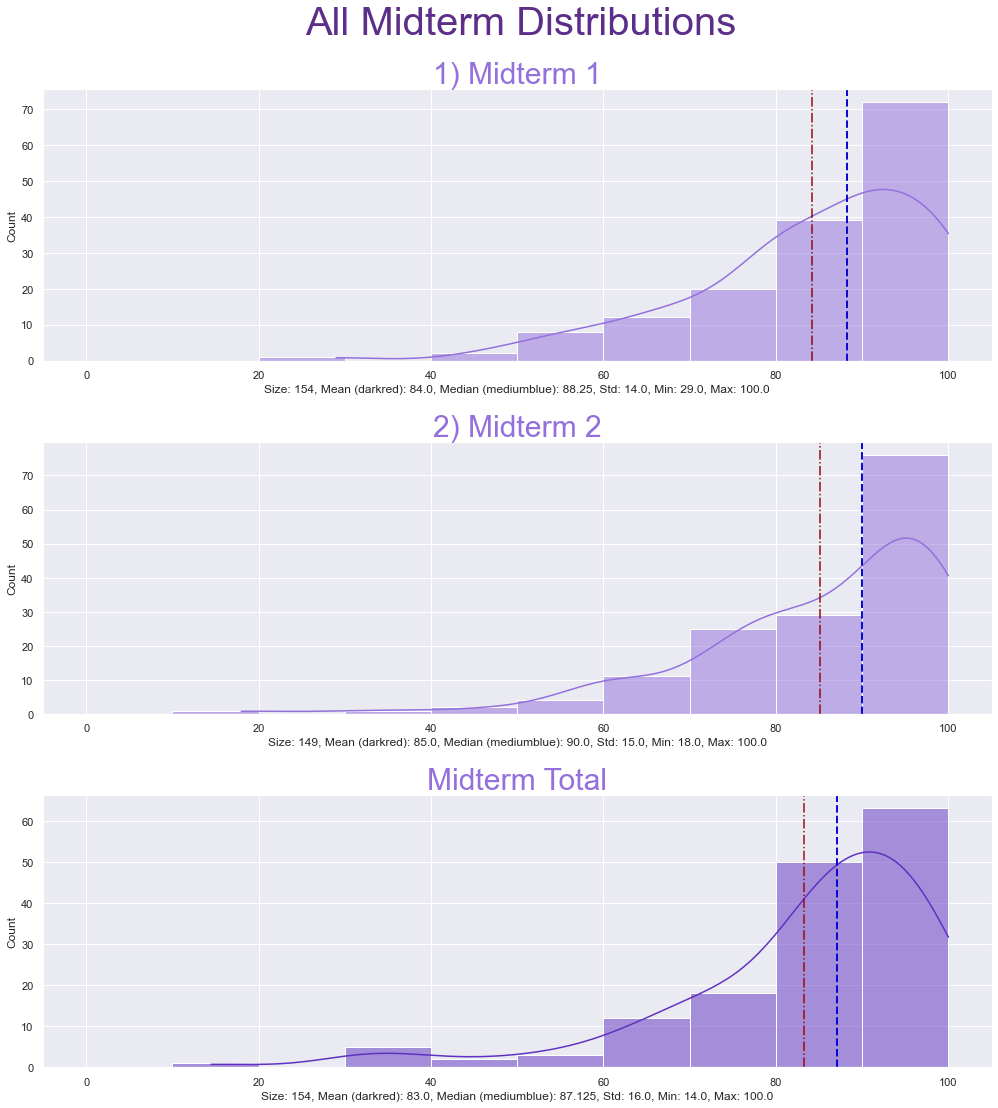

In [5]:
course.plot_grade_item(course.grade_items_by_category[course.grade_item_categories[1]][5])
print("\n"*5)
course.plot_by_type(course.grade_item_categories[2%len(course.grade_item_categories)])

## Scatter Plots
+ Select the grade items you would like to compare with other grade items to get an array of scatter plots. 
    + Enter the number of columns you would like
    + 4 color pallettes are set for you below. Feel free to change them.
        + Uncomment the **show_me_the_colors** command to display many of the colors you could choose from. 

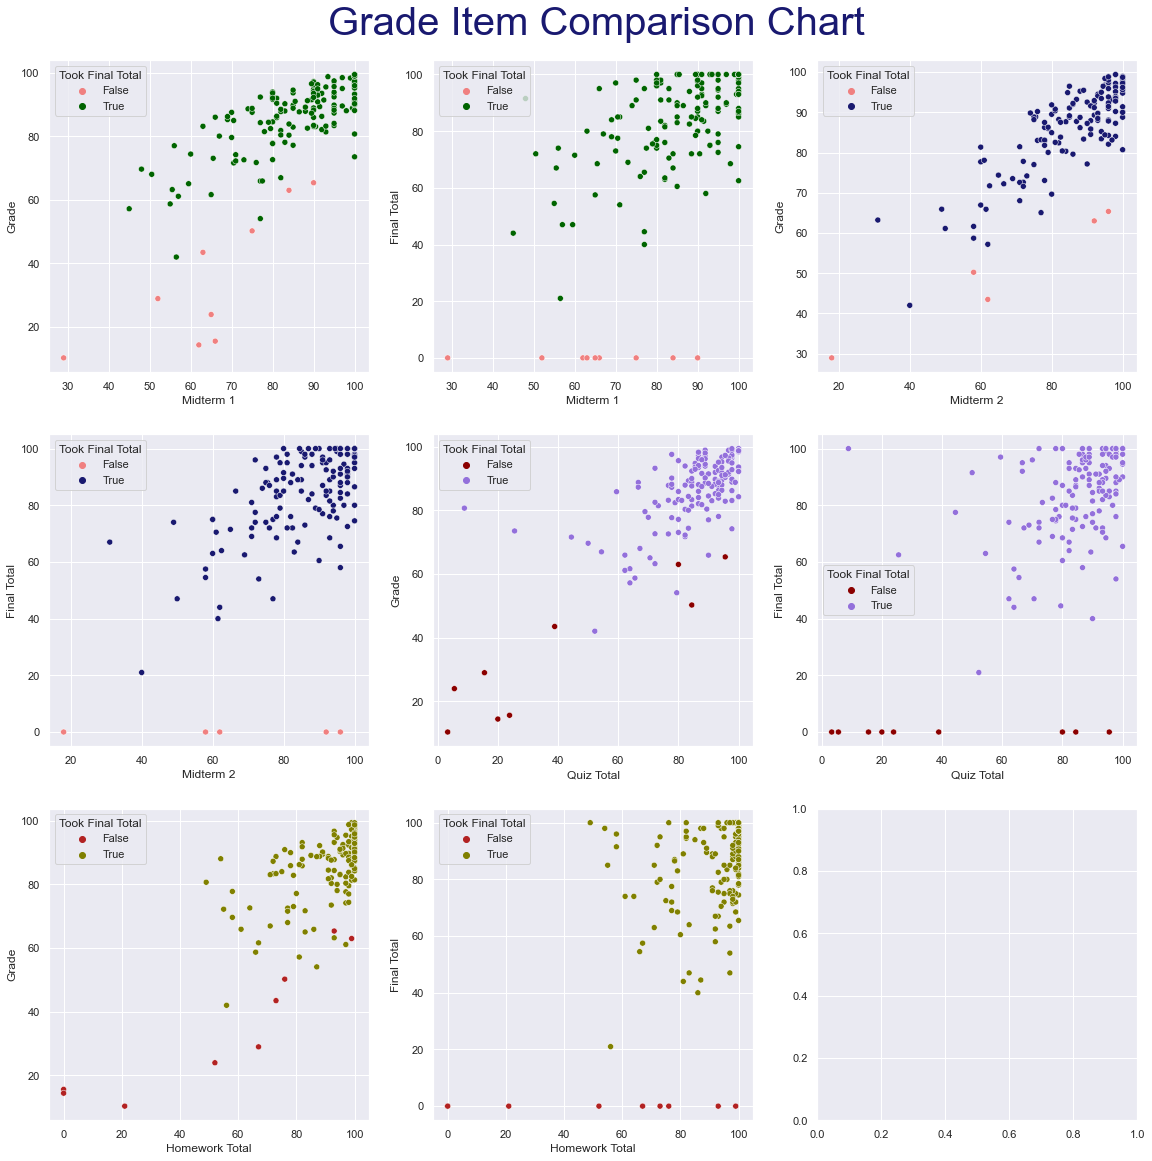

<Figure size 432x288 with 0 Axes>

In [6]:
# course.show_me_the_colors()
grade_items = ["Midterm 1", "Midterm 2", "Quiz Total", "Homework Total"]
against_items = ["Grade", "Final Total"]
test_grade_item = "Final Total"

#Palett Choices - The plotting function will cycle through these. 
palette_1 = {True:"darkgreen", False:"lightcoral"}
palette_2 = {True:"midnightblue", False:"lightcoral"}
palette_3 = {True:"mediumpurple", False:"darkred"}
palette_4 = {True:"olive", False:"firebrick"}
palette_list = [palette_1, palette_2, palette_3, palette_4]

course.scatter_plot(grade_items = grade_items, 
                   against_items = against_items, 
                   num_columns = 3, 
                   test_grade_item = test_grade_item, 
                   palette_list = palette_list)

## Looking Into Linear Regression
+ Enter two grade items that seem like good candidates from the scatter plots above.  
+ The plot below will run a linear regression via Sklearn with a train-test split of 80/20.
    + Plot the **test values against the linear fit** to examine the error. 
    + Transform by the line to check for **Homoscedasticity**.
    + Plot the density of error values to check for **Normality**. 

0.4571496817923991


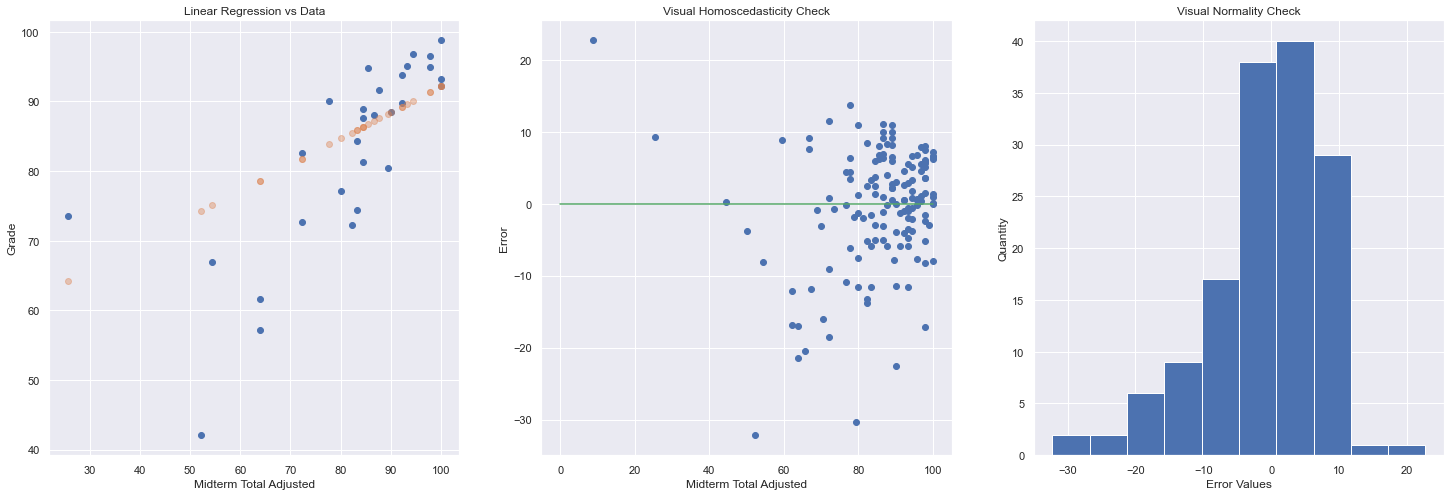

In [7]:
course.plot_linear_test("Quiz Total", "Grade", "Took Final Total")

### A Nifty Seaborn Tool
What you see below looks really cool, but it's just a built in Seaborn tool. The steps you saw above had the (admittedly basic) machine learning done by the Grades Class. 

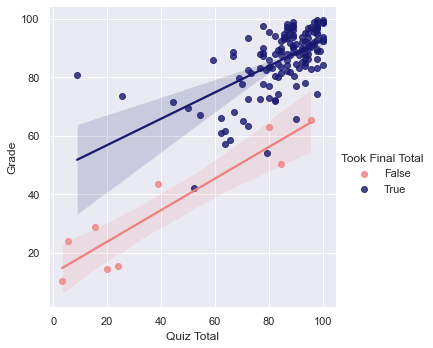

In [8]:
sns.lmplot(x = "Quiz Total", y = "Grade", hue = "Took Final Total", data = course.grades, palette = palette_2)
plt.show()